# HomeWork 9

**DeadLine : 23:59 5 Azar 1399**

**Total points : 100 pts**

Import some prerequisites.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

Run this cell for plotting.

In [2]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

# PART 2

Here is for your helper functions (optional).

Implement this function for Augmented reality.

In [3]:
def AR(background, image):
    '''
    Adds the input image to the background image properly.
    
    Parameters:
        background (numpy.ndarray) : background image
        image (numpy.ndarray): input image
    
    Returns:
        numpy.ndarray: The result image.
    '''
    
    out_img = background.copy()

    #Write your code here
    pts1 = np.float32([[235,233],[146,224],[150,109],[233,106]])
    pts2 = np.float32([[1199,1799],[0,1799],[0,0],[1199,0]])
    M, mask = cv2.findHomography(pts2, pts1)
    
    masked_img = cv2.warpPerspective(image, M, (background.shape[1],background.shape[0]))

    
    for i in range(background.shape[0]):
        for j in range(background.shape[1]):
            for k in range(background.shape[2]):
                if masked_img[i,j,k]>0:
                     out_img[i,j,k]=masked_img[i,j,k]

    return out_img

Test your implementation (dont change this cell)

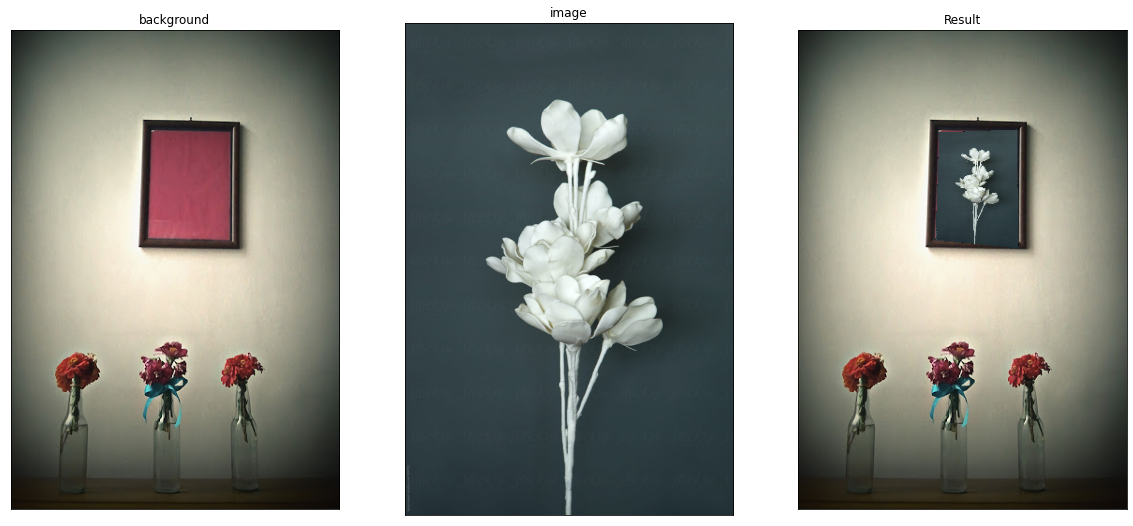

In [4]:
image_list = []

background = cv2.imread(os.path.join('images', 'background.jpg'))
background = cv2.cvtColor(background, cv2.COLOR_BGR2RGB)
image_list.append([background, 'background', 'img'])

image = cv2.imread(os.path.join('images', '1.jpg'))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_list.append([image, 'image', 'img'])

image_list.append([AR(background, image), 'Result', 'img'])


plotter(image_list,1 , 3, True, 20, 10, '2')

# PART 3A

Here is for your helper functions (optional).

In [295]:
def compute_histogram(image):

    '''
    Computes histogram of the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The numpy array of numbers in histogram.   
    '''
    
    histogram = np.zeros((256), np.int)
    
    ####### your code ########
    n,m=image.shape
    for i in range(0,n):
        for j in range(0,m):
            histogram[image[i,j]]+=1

                    
    ##########################
    
    return histogram

Implement this function to get the global otsu algorithm output.

In [296]:
def global_otsu(image):
    '''
    Applys global otsu on the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result panorama image.
    '''



   

    
    out_img = image.copy()
    
       
    
    #Write your code here
    final_value = 99999999
    final_thresh = 0
    histogram = compute_histogram(image)
    pixel_count = np.sum(histogram)
    for t in range(1, 255):
        W1 = np.sum(histogram[:t])/pixel_count
        W2 = np.sum(histogram[t:])/pixel_count
        V1 = np.var(image[image < t])
        V2 = np.var(image[image >= t])
        value = W1 * V1 + W2 * V2
        if value < final_value:
            final_value = value
            final_thresh = t
    final_img = image.copy()
    out_img[final_img > final_thresh] = 255
    out_img[final_img < final_thresh] = 0
    
    return out_img

Test your implementation (dont change this cell)

c:\users\zahra\appdata\local\programs\python\python36\lib\site-packages\numpy\core\fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
c:\users\zahra\appdata\local\programs\python\python36\lib\site-packages\numpy\core\_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
c:\users\zahra\appdata\local\programs\python\python36\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


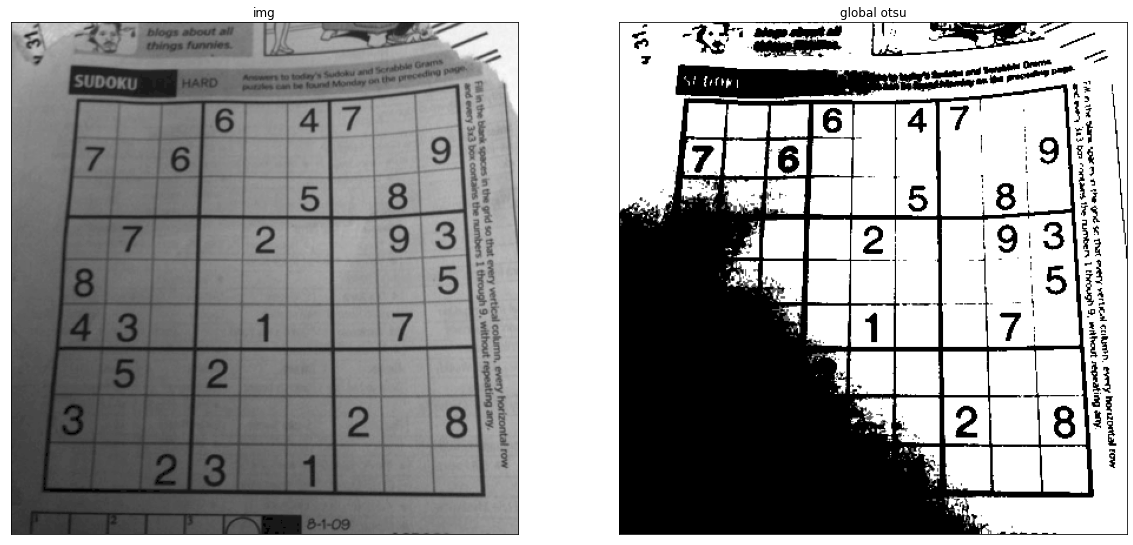

In [297]:
image_list = []

image = cv2.imread(os.path.join('images', 'q2.png'), cv2.IMREAD_GRAYSCALE)
image_list.append([image, 'img', 'img'])



image_list.append([global_otsu(image), 'global otsu', 'img'])

plotter(image_list, 1, 2, True, 20, 10, '3A')

# PART 3B

Here is for your helper functions (optional).

Implement this function to get local otsu algorithm output.

In [298]:
def local_otsu(image):
    '''
    Applys local otsu on the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result panorama image.
    '''
    
    out_img = image.copy()
    
    #Write your code here

    half_rows=image.shape[0]//2
    half_cols=image.shape[1]//2
    out_img[:half_rows, :half_cols] = global_otsu(image[:half_rows, :half_cols])
    out_img[:half_rows, half_cols:] = global_otsu(image[:half_rows, half_cols:])
    out_img[half_rows:, :half_cols] = global_otsu(image[half_rows:, :half_cols])
    out_img[half_rows:, half_cols:] = global_otsu(image[half_rows:, half_cols:])
    
    return out_img

Test your implementation (dont change this cell)

c:\users\zahra\appdata\local\programs\python\python36\lib\site-packages\numpy\core\fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
c:\users\zahra\appdata\local\programs\python\python36\lib\site-packages\numpy\core\_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
c:\users\zahra\appdata\local\programs\python\python36\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


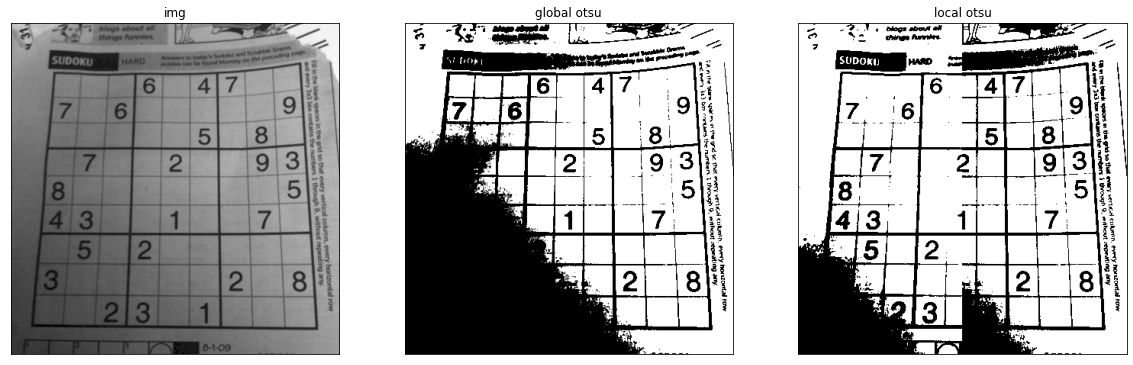

In [299]:
image_list = []

image = cv2.imread(os.path.join('images', 'q2.png'),cv2.IMREAD_GRAYSCALE)
image_list.append([image, 'img', 'img'])


image_list.append([global_otsu(image), 'global otsu', 'img'])
image_list.append([local_otsu(image), 'local otsu', 'img'])

plotter(image_list, 1, 3, True, 20, 10, '3B')

# PART 3C

Here is for your helper functions (optional).

Implement this function to get the adaptive threshold algorithm output.

In [303]:
def adaptive_th(image):
    '''
    Applys adaptive threshold on the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result panorama image.
    '''
    
    out_img = image.copy()
    
    #Write your code here
    out_img = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,6)

    return out_img

Test your implementation (dont change this cell)

c:\users\zahra\appdata\local\programs\python\python36\lib\site-packages\numpy\core\fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
c:\users\zahra\appdata\local\programs\python\python36\lib\site-packages\numpy\core\_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
c:\users\zahra\appdata\local\programs\python\python36\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


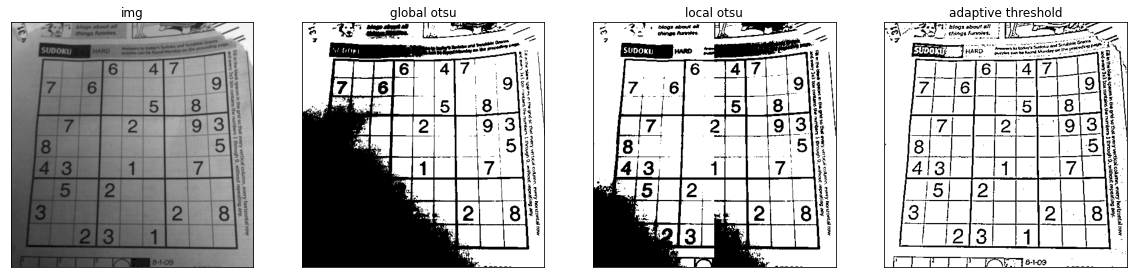

In [304]:
image_list = []

image = cv2.imread(os.path.join('images', 'q2.png'),cv2.IMREAD_GRAYSCALE)
image_list.append([image, 'img', 'img'])


image_list.append([global_otsu(image), 'global otsu', 'img'])
image_list.append([local_otsu(image), 'local otsu', 'img'])
image_list.append([adaptive_th(image), 'adaptive threshold', 'img'])

plotter(image_list, 1, 4, True, 20, 10, '3C')

# PART 4

Here is for your helper functions (optional).

In [18]:
def filter_corners(corners,image):
    corners = cv2.dilate(corners, None)
    max_corner_value=corners.max()
    indexex = np.where(corners > 0.04 * max_corner_value)
    filtered_points=np.zeros((image.shape[0],image.shape[1]))
    filtered_points[indexex]=1
    return filtered_points

In [6]:
def find_and_filter_keypoints(image):
    corners = cv2.cornerHarris(cv2.cvtColor(image,cv2.COLOR_BGR2GRAY), 3, 3, 0.1)
    best_corners=filter_corners(corners,image)
    return best_corners

In [17]:
def checking(keypoints,h,w,discriptor_size,threshold,i,j):
    if keypoints[i, j]:
            if i + discriptor_size >= h or j + discriptor_size >= w or i -discriptor_size < 0 or j - discriptor_size < 0:
                keypoints[i, j] = 0
            else:
                keypoints[i - threshold:i + threshold + 1, j -threshold:j + threshold + 1] = 0
                keypoints[i, j] = 1
    return keypoints

In [16]:
def double_filtering_keypoints(keypoints_image1,keypoints_image2,threshold, discriptor_size):
    
    h, w = keypoints_image1.shape
    
    discriptor_size=discriptor_size//2
    threshold=threshold//2
    for i in range(h):
        for j in range(w):
            keypoints_image1=checking(keypoints_image1,h,w,discriptor_size,threshold,i,j)
                    
    h, w=keypoints_image2.shape
    for i in range(h):
        for j in range(w):
            keypoints_image2=checking(keypoints_image2,h,w,discriptor_size,threshold,i,j)
                        
    return keypoints_image1,keypoints_image2

In [22]:
def compare_windows(image1, keypoints_image1, image2, keypoints_image2, disc_size):
    x = disc_size // 2
    scores_list = []
    for s in keypoints_image1:
        temp = -1
        best_score = 0
        for d in keypoints_image2:
            windows1 = image1[s[0] - x:s[0] + x + 1, s[1] - x:s[1] + x + 1, :]
            windows2 = image2[d[0] - x:d[0] + x + 1, d[1] - x:d[1] + x + 1, :]
            sc = cv2.matchTemplate(windows1, windows2, cv2.TM_CCORR_NORMED)
            if sc > temp:
                temp = sc
                best_score = d
        scores_list.append(best_score)
    return scores_list

In [14]:
def indexing(keypoints):
    indexes=list()
    for i in range(keypoints.shape[0]):
        for j in range(keypoints.shape[1]):
            if keypoints[i,j]==1:
                indexes.append(tuple((i,j)))
    return indexes

In [19]:
def draw_lines(srcs, dsts, image, image2):
    resizer=image2.shape[1]
    for src_point, tar_point in zip(srcs, dsts):
        src_inverted = (src_point[1], src_point[0])
        tar_inverted = (tar_point[1] + resizer, tar_point[0])
        cv2.line(image, src_inverted, tar_inverted, (np.random.randint(0, 255),
                                                     np.random.randint(0, 255), np.random.randint(0, 255)), 2)
    return image

Implement matching here.

In [24]:
def find_match(image1, image2):
    '''
    Finds match points between two input images.
    
    Parameters:
        image1 (numpy.ndarray): input image.
        image2 (numpy.ndarray): second input image.
    
    Returns:
        numpy.ndarray: The result image.
    '''
    
    result = None
    
    #Write your code here
    threshold = 11
    discriptor_size = 15
    keypoints_image1 = find_and_filter_keypoints(image1)
    keypoints_image2 = find_and_filter_keypoints(image2)

    keypoints_image1,keypoints_image2=double_filtering_keypoints(keypoints_image1,keypoints_image2,threshold, discriptor_size)
    
    keypoints_image1 = indexing(keypoints_image1)
    keypoints_image2 = indexing(keypoints_image2)
    rslt = compare_windows(image1, keypoints_image1, image2, keypoints_image2,discriptor_size)
    f = np.concatenate([image1, image2], axis = -2)
    result = draw_lines(keypoints_image1, rslt, f, image2)



    return result

Test your implementation (dont change this cell)

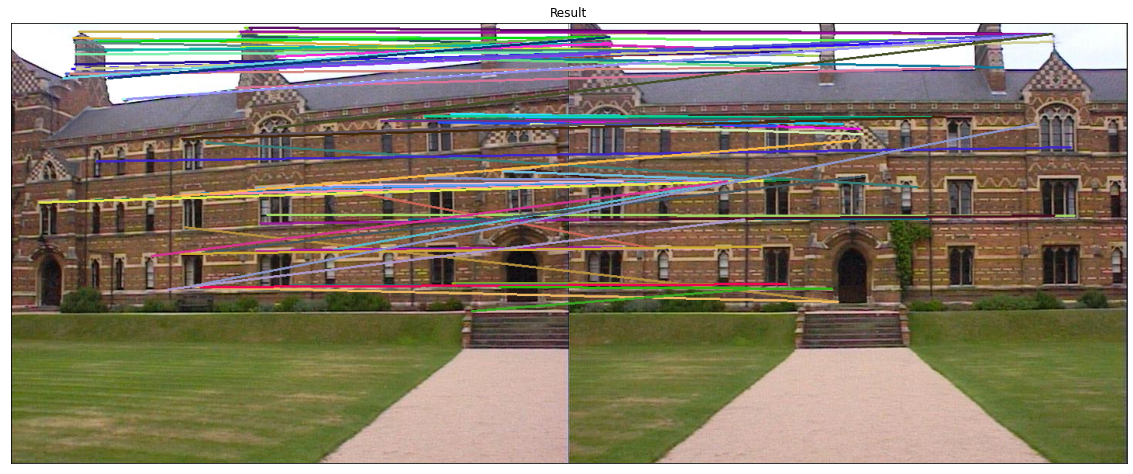

In [25]:
image_list = []

image1 = cv2.imread(os.path.join('images', 'building1.jpg'))
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)


image2 = cv2.imread(os.path.join('images', 'building2.jpg'))
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

image_list.append([find_match(image1,image2), 'Result', 'img'])

plotter(image_list,1 , 1, True, 20, 10, '4')

for create proper files for sending in quera run this cell.

In [26]:
!python notebook_converter.py

End!!!